## Business Problem:

The company  is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## Aim and Goals:

This project analyzes aviation accident data from 1962 to 2023 to identify the safest aircraft models. By understanding accident trends, risk factors, and aircraft performance, we aim to provide actionable insights that guide the company in selecting low-risk aircraft for its new aviation division.
Project Goals:
-  Identify aircraft models with the lowest accident rates.
-  Highlight key risk factors contributing to aviation accidents.
-  Provide data-backed recommendations for safe aircraft investme


# 1. Understanding the data

Understanding the data helps to clearly grasp what the dataset entails, including what each column represents, the types of values contained, and how complete or consistent it is. This clarity allows you to identify relevant patterns, spot missing or incorrect entries, to ultimately ensures that you conduct accurate and meaningful analyses.

In [532]:
# loading the data
import pandas as pd 
aviationdata = pd.read_csv("Aviation_Data /AviationData.csv", encoding='cp1252')

/var/folders/3s/d5pt38l9793djb6wv9n_4d6w0000gn/T/ipykernel_76904/3486649267.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviationdata = pd.read_csv("Aviation_Data /AviationData.csv", encoding='cp1252')


The warning means that pandas found columns containing mixed data types (strings and numbers).
It's a common warning with large or unstructured datasets which now brings us to the next step of cleaning the data

In [533]:
# viewing the first five rows
aviationdata.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [534]:
# viewing the general info of the data 
aviationdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

The above general infomation helps to quickly understand the data I am working on in my case:
- The dataset contains 88,889 entries and 31 columns.
- Reveals the type of data if its text ,numbers or floats in each column.
- Identifies columns with missing data.
- Reveals the current data type of data each column.

# 2. Data Cleaning 

Data cleaning is crucial  as it ensures our data is clean, structured, and reliable to perform accurate analysis and extract meaningful insights.
This process will include:
- Handling missing values
- Dealing with duplicates
- Correcting data types
- standardizing the date formarts

In [535]:
''' Creating a copy of my data so as to work on the copy instead of of original data'''
avidatacopy = aviationdata.copy()

In [536]:
avidatacopy.head(n=3)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007


## i) Handling missing values 

In [537]:
# Checking for all the columns with missing values and the count of values missing
avidatacopy.isnull().sum()[avidatacopy.isnull().sum()>0]

Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: int64

- Replacing the Location missing values with "Unknown" since we do not know the location names

In [538]:
# Handling missing values in the Location column 
avidatacopy["Location"]= avidatacopy["Location"].fillna("Unknown")

In [539]:
avidatacopy["Location"].isnull().sum()

0

- Filling the missing country names with the most frequent country occuring 

In [540]:
#The most frequent country is United States
avidatacopy["Country"].value_counts()

Country
United States                       82248
Brazil                                374
Canada                                359
Mexico                                358
United Kingdom                        344
                                    ...  
Seychelles                              1
Palau                                   1
Libya                                   1
Saint Vincent and the Grenadines        1
Turks and Caicos Islands                1
Name: count, Length: 219, dtype: int64

In [541]:
#filling the missing values with the mode()
frequent_country = avidatacopy["Country"].mode().iloc[0]
frequent_country

'United States'

In [542]:
# replacing the missing values withe mode()
avidatacopy["Country"] = avidatacopy["Country"].fillna(frequent_country)

In [543]:
avidatacopy["Country"].isnull().sum()

0

- Dropping both the Latitude and longitude columns since they have alot of missing values 
- In my analysis I will use the Locations and country instead of the latitude and longitude

In [544]:
#Dropping both the latitude and longitude columns
avidatacopy.drop(columns=['Latitude', 'Longitude'], inplace=True)

- Dropping the Airport.Code column for it has alot of missing values

In [545]:
avidatacopy["Airport.Code"].value_counts()

Airport.Code
NONE    1488
PVT      485
APA      160
ORD      149
MRI      137
        ... 
7NJ9       1
CWV        1
5QA        1
M55        1
EIKH       1
Name: count, Length: 10374, dtype: int64

In [546]:
avidatacopy = avidatacopy.drop(columns = ["Airport.Code"])

In [547]:
# Checking the remaining columns after dropping some of them
avidatacopy.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Name', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

- filling the Airport.Name missing values with "Unknown" since we were not given the Airport.Names

In [548]:
avidatacopy["Airport.Name"] = avidatacopy["Airport.Name"].fillna("Unknown")

In [549]:
# Confirming the data information so far after the changes.
avidatacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Airport.Name            88889 non-null  object 
 7   Injury.Severity         87889 non-null  object 
 8   Aircraft.damage         85695 non-null  object 
 9   Aircraft.Category       32287 non-null  object 
 10  Registration.Number     87507 non-null  object 
 11  Make                    88826 non-null  object 
 12  Model                   88797 non-null  object 
 13  Amateur.Built           88787 non-null  object 
 14  Number.of.Engines       82805 non-null

Dropping the numbers in brackets after Fatal to categorize all the fatal as "Fatal" and filling the missing values with the mode().

In [550]:
#viewing the column to understand how it looks like
avidatacopy["Injury.Severity"].value_counts()

Injury.Severity
Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(270)        1
Fatal(60)         1
Fatal(43)         1
Fatal(143)        1
Fatal(230)        1
Name: count, Length: 109, dtype: int64

In [551]:
# Dropping the numbers in brackets after the Fatal and accounting for different values in the column including NaN
def cleaned_injury_severity(data):
    cleaned_data = []
    for word in data:
        if isinstance(word, float):
            cleaned_data.append(None)
        elif word == "Fatal":
            cleaned_data.append(word)
        elif "Fatal" in word:
            cleaned_data.append(word.split("(")[0])
        else:
            cleaned_data.append(word)
    return cleaned_data

avidatacopy["Injury.Severity"] = cleaned_injury_severity(avidatacopy["Injury.Severity"])

In [552]:
#Confirming the code has changed and worked
avidatacopy["Injury.Severity"].value_counts()

Injury.Severity
Non-Fatal      67357
Fatal          17826
Incident        2219
Minor            218
Serious          173
Unavailable       96
Name: count, dtype: int64

In [553]:
# Checking the missing values 
avidatacopy["Injury.Severity"].isnull().sum()

1000

- We have 1000 missing values from the avidatacopy["Injury.Severity"]. 
- To make sure the values are uniform I will fill the missing values with "Unavailable" since we were not given the severity of the accident.
- Incident is not clear whether injury occured and was not recorded or there was no injury *It required further investigation*
- "Incidents" in the column is meant to represent injury severity, but it suggests that either the data entry is inconsistent or that the information is being misclassified 
- Non-Fatal does not indicate whether the injuries were serious or minor ,it only conculdes that the accident did not lead to death.
- To investigate this column I will use the Total.Fatal.Injuries ,Total.Serious.Injuries ,Total.Minor.Injuries ,Total.Uninjured  columns to determine the Injury .Severity.
- I will create another column to clasiffy the Severity as [Fatal,Serious injuries,Minor injuries,Uninjured,Unknown] This will give a clear view of the severity while clasiffying even the Unknown ones.

To achieve the above I first have to ensure the columns ["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]
Do not have missing values and if they have I will use the placeholder of "Unknow" to avoiding assuming the counts 

In [554]:
# Checking for missing values in the column Total.Fatal.Injuries
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
missing_value_sum = avidatacopy[injury_cols].isnull().sum()
missing_value_sum

Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
dtype: int64

The above code prints the sum of all the missing values in the columns I am working with.To ensure I get the expected results the missing values will be filled with "Unknown" to avoid using 0 and assuming

In [555]:
# Filling the missing values of the columns with "unknown"
filling_severity = avidatacopy[["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]].fillna('Unknown')
avidatacopy[["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]] = filling_severity

- After filling the missing values with "Unknown" ,I will now create a new column which will classify the severity according to the above columns
- To achieve that and know where each accident fall ,I will take the column with the maximum number to define to classification.If all the columns are Unknown then the Accident falls under Unknown.

In [556]:
# A function to loop through the columns and classify them 
def Classification(row):
    injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
    Severity_labels = ["Fatal", "Serious injuries", "Minor injuries", "Uninjured", "Unknown"]
    if all(row[col] == 'Unknown' for col in injury_cols):
        return "Unknown"
    max_value = -1
    max_col = None
    for col in injury_cols:
        if row[col] != 'Unknown' and float(row[col]) > max_value:
            max_value = float(row[col])
            max_col = col
    
    return Severity_labels[injury_cols.index(max_col)] if max_col else "Unknown"
avidatacopy["Severity"] = avidatacopy.apply(Classification, axis=1)

In [557]:
#Confirming the column was added and classification was done as expected
avidatacopy.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Severity
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Fatal,Destroyed,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,Fatal
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Fatal,Destroyed,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,Fatal
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Unknown,Fatal,Destroyed,NaN,...,NaN,3.0,Unknown,Unknown,Unknown,IMC,Cruise,Probable Cause,26-02-2007,Fatal
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Fatal,Destroyed,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,Fatal
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Fatal,Destroyed,NaN,...,NaN,1.0,2.0,Unknown,0.0,VMC,Approach,Probable Cause,16-04-1980,Serious injuries


In [558]:
#Checking the number of occurrencies of the new column values
avidatacopy["Severity"].value_counts()

Severity
Uninjured           49793
Fatal               18048
Minor injuries      11042
Serious injuries     9783
Unknown               223
Name: count, dtype: int64

- Since I have the Severity column I will drop the Initially Injury.Severity column since it had inconsistent values.
- In my analysis I will be using the Severity column 

In [559]:
avidatacopy.drop("Injury.Severity",axis = 1,inplace = True)

In [560]:
#Confirming the column is dropped
avidatacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Airport.Name            88889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Aircraft.Category       32287 non-null  object 
 9   Registration.Number     87507 non-null  object 
 10  Make                    88826 non-null  object 
 11  Model                   88797 non-null  object 
 12  Amateur.Built           88787 non-null  object 
 13  Number.of.Engines       82805 non-null  float64
 14  Engine.Type             81793 non-null

Using "Unknown" to replace the missing values  in the Aircraft.damage column 

In [561]:
#checking the already available values
avidatacopy["Aircraft.damage"].value_counts()

Aircraft.damage
Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: count, dtype: int64

In [562]:
avidatacopy.loc[:, "Aircraft.damage"] = avidatacopy["Aircraft.damage"].fillna("Unknown")

In [563]:
avidatacopy["Aircraft.damage"].isnull().sum()

0

For the ;
- Aircraft.Category
- Registration
- Engine.Type
- Report.Status
- Broad.phase.of.flight  I will Use "Unknown" to replace the missing values  in the column 

In [564]:
# Getting a view of the available values
avidatacopy["Aircraft.Category"].value_counts()

Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [565]:
avidatacopy.loc[:, "Aircraft.Category"] = avidatacopy["Aircraft.Category"].fillna("Unknown")

In [566]:
avidatacopy["Aircraft.Category"].isnull().sum()

0

In [567]:
avidatacopy.loc[:, "Registration.Number"] = avidatacopy["Registration.Number"].fillna("Unknown")

In [568]:
avidatacopy["Registration.Number"].isnull().sum()

0

In [569]:
avidatacopy["Engine.Type"].value_counts()

Engine.Type
Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

In [570]:
#since there is  2051 unknown Engine.Type I will add the other missing values as unknown
avidatacopy.loc[:, "Engine.Type"] = avidatacopy["Engine.Type"].fillna("Unknown")

In [571]:
avidatacopy["Broad.phase.of.flight"].value_counts()

Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

In [572]:
avidatacopy.loc[:, "Broad.phase.of.flight"] = avidatacopy["Broad.phase.of.flight"].fillna("Unknown")

In [573]:
avidatacopy.loc[:, "Report.Status"] = avidatacopy["Report.Status"].fillna("Unknown")

Dropping columns with many missing values such as;
- FAR.Description
- Schedule,Air.carrier

In [574]:
avidatacopy.drop(columns=["FAR.Description", "Schedule","Air.carrier"], inplace=True)

In [575]:
#checking the data info and confirming the columns have been dropped
avidatacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Airport.Name            88889 non-null  object 
 7   Aircraft.damage         88889 non-null  object 
 8   Aircraft.Category       88889 non-null  object 
 9   Registration.Number     88889 non-null  object 
 10  Make                    88826 non-null  object 
 11  Model                   88797 non-null  object 
 12  Amateur.Built           88787 non-null  object 
 13  Number.of.Engines       82805 non-null  float64
 14  Engine.Type             88889 non-null

- Filling this columns with most frequent value
- Make
- Model
- Amateur.Built
- Number.of.Engines
- Purpose.of.flight
- Weather.Condition

In [576]:
avidatacopy.loc[:, "Make"] = avidatacopy["Make"].fillna(avidatacopy["Make"].mode()[0])

In [577]:
avidatacopy.loc[:, "Model"] = avidatacopy["Model"].fillna(avidatacopy["Model"].mode()[0])

In [578]:
avidatacopy.loc[:, "Purpose.of.flight"] = avidatacopy["Purpose.of.flight"].fillna(avidatacopy["Purpose.of.flight"].mode()[0])

In [579]:
avidatacopy.loc[:, "Amateur.Built"] = avidatacopy["Amateur.Built"].fillna(avidatacopy["Amateur.Built"].mode()[0])

In [580]:
avidatacopy.loc[:, "Number.of.Engines"] = avidatacopy["Number.of.Engines"].fillna(avidatacopy["Number.of.Engines"].mode()[0])

In [581]:
avidatacopy.loc[:, "Weather.Condition"] = avidatacopy["Weather.Condition"].fillna(avidatacopy["Weather.Condition"].mode()[0])

- For the Publication.Date in order to handel the missing values ,I will use the Event.Date column which has no missing values.
- With Event.Date I will calculate the difference between publication_date and event_date for records where both exist.
- Using the gap between the two dates of the dates available I will be able to get the average gap and use it to fill in missing       publication_date by adding the average gap to event_date.

To achieve the above the columns should be in datetype data type

In [582]:
avidatacopy["Event.Date"].dtype

dtype('O')

In [583]:
avidatacopy["Event.Date"]

0        1948-10-24
1        1962-07-19
2        1974-08-30
3        1977-06-19
4        1979-08-02
            ...    
88884    2022-12-26
88885    2022-12-26
88886    2022-12-26
88887    2022-12-26
88888    2022-12-29
Name: Event.Date, Length: 88889, dtype: object

In [584]:
#converting Event.Date column to datetime since it's stored as object.
avidatacopy["Event.Date"] = pd.to_datetime(avidatacopy["Event.Date"],format = "%Y-%m-%d")

In [585]:
avidatacopy["Publication.Date"].dtype

dtype('O')

In [586]:
# standardizing my publication date column since it has both (/)and (-) as the seperators of the date
avidatacopy["Publication.Date"] = avidatacopy["Publication.Date"].astype(str).str.replace("/", "-")
avidatacopy["Publication.Date"]

0               nan
1        19-09-1996
2        26-02-2007
3        12-09-2000
4        16-04-1980
            ...    
88884    29-12-2022
88885           nan
88886    27-12-2022
88887           nan
88888    30-12-2022
Name: Publication.Date, Length: 88889, dtype: object

In [587]:
avidatacopy["Publication.Date"] = pd.to_datetime(avidatacopy["Publication.Date"],format = "%d-%m-%Y")

In [588]:
print(avidatacopy["Event.Date"].dtype)

datetime64[ns]


In [589]:
print(avidatacopy["Publication.Date"].dtype)

datetime64[ns]


In [590]:
#Calculating the dates gap
avidatacopy["gap"]= (avidatacopy["Publication.Date"] - avidatacopy["Event.Date"]).dt.days
avidatacopy["gap"]

0            NaN
1        12481.0
2        11868.0
3         8486.0
4          258.0
          ...   
88884        3.0
88885        NaN
88886        1.0
88887        NaN
88888        1.0
Name: gap, Length: 88889, dtype: float64

In [591]:
#Checking for the extreem days executed 
avidatacopy.loc[avidatacopy["gap"] > 10000, ["Publication.Date", "Event.Date", "gap"]].head()

,Publication.Date,Event.Date,gap
1,1996-09-19,1962-07-19,12481.0
2,2007-02-26,1974-08-30,11868.0
5,2017-09-19,1979-09-17,13882.0
260,2011-05-05,1982-02-07,10679.0
293,2017-10-30,1982-02-11,13045.0


In [592]:
#The average time it takes from when an event happens to when its publicated 
average_gap = avidatacopy["gap"].mean()  # Mean gap in days
print(f"Average gap between Event and Publication: {average_gap} days")

Average gap between Event and Publication: 1025.3769669054022 days


In [593]:
# Using the average days to fill in the missing values in the publication date column 
missing_dates = avidatacopy["Publication.Date"].isna()
avidatacopy.loc[missing_dates, "Publication.Date"] = avidatacopy["Event.Date"] + pd.Timedelta(days=average_gap)

In [594]:
avidatacopy["Event.Date"].isnull().sum()

0

In [595]:
# Dropping the gap column after filling the missing values
avidatacopy.drop(columns=["gap"], inplace=True)

- confirming the data Information has no missing values after all the modification

In [596]:
avidatacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88889 non-null  object        
 5   Country                 88889 non-null  object        
 6   Airport.Name            88889 non-null  object        
 7   Aircraft.damage         88889 non-null  object        
 8   Aircraft.Category       88889 non-null  object        
 9   Registration.Number     88889 non-null  object        
 10  Make                    88889 non-null  object        
 11  Model                   88889 non-null  object        
 12  Amateur.Built           88889 non-null  object

## ii) Handling the datatypes 

Handling datatypes correctly is crucial because it ensures:
- Reduces memory consumption.
- Avoiding type errors when working with different datas
- It increases data accuracy

In [597]:
avidatacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88889 non-null  object        
 5   Country                 88889 non-null  object        
 6   Airport.Name            88889 non-null  object        
 7   Aircraft.damage         88889 non-null  object        
 8   Aircraft.Category       88889 non-null  object        
 9   Registration.Number     88889 non-null  object        
 10  Make                    88889 non-null  object        
 11  Model                   88889 non-null  object        
 12  Amateur.Built           88889 non-null  object

In [605]:
avidatacopy.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Aircraft.damage,Aircraft.Category,Registration.Number,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Severity
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Destroyed,Unknown,NC6404,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,1951-08-15 09:02:49.940626752,Fatal
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Destroyed,Unknown,N5069P,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19 00:00:00.000000000,Fatal
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Unknown,Destroyed,Unknown,N5142R,...,Personal,3.0,Unknown,Unknown,Unknown,IMC,Cruise,Probable Cause,2007-02-26 00:00:00.000000000,Fatal
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Destroyed,Unknown,N1168J,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-09-12 00:00:00.000000000,Fatal
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Destroyed,Unknown,N15NY,...,Personal,1.0,2.0,Unknown,0.0,VMC,Approach,Probable Cause,1980-04-16 00:00:00.000000000,Serious injuries


In [611]:
# Column Investigation.Type is object but can be converted to categorical data type 
avidatacopy['Investigation.Type'] = avidatacopy['Investigation.Type'].astype('category')

In [617]:
# changing column Aircraft.damage from object to categorical datattype ,it has limited set of unique values
avidatacopy['Aircraft.damage'] = avidatacopy['Aircraft.damage'].astype('category')

In [621]:
# changing Amateur.Built from object to boolen since it has only "yes and "No" values
avidatacopy['Amateur.Built'] = (avidatacopy['Amateur.Built'] == 'Yes').astype(bool)

In [627]:
#Changing Severity column from object to categorical data type 
avidatacopy['Severity'] = avidatacopy['Severity'].astype('category')

In [634]:
#Changing the Total.Fatal.Injuries to floats and since it has the "Unknown' that will be converted to NaN
avidatacopy['Total.Fatal.Injuries'] = pd.to_numeric(avidatacopy['Total.Fatal.Injuries'], errors='coerce')

In [633]:
#Changing the Total.Serious.Injuries to floats to ease analysis
avidatacopy['Total.Serious.Injuries'] = pd.to_numeric(avidatacopy['Total.Serious.Injuries'], errors='coerce')

In [635]:
#Coercing the Total.Minor.Injuries to floats
avidatacopy['Total.Minor.Injuries'] = pd.to_numeric(avidatacopy['Total.Minor.Injuries'], errors='coerce')

In [636]:
#Coercing the Total.Uninjured to floats
avidatacopy['Total.Uninjured'] = pd.to_numeric(avidatacopy['Total.Uninjured'], errors='coerce')

In [637]:
#Checking if all the data types has been changed and if I missing any 
avidatacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  category      
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88889 non-null  object        
 5   Country                 88889 non-null  object        
 6   Airport.Name            88889 non-null  object        
 7   Aircraft.damage         88889 non-null  category      
 8   Aircraft.Category       88889 non-null  object        
 9   Registration.Number     88889 non-null  object        
 10  Make                    88889 non-null  object        
 11  Model                   88889 non-null  object        
 12  Amateur.Built           88889 non-null  bool  

In [639]:
#Saving the clean data as CSV
avidatacopy.to_csv("avidatacopy.csv",index = False)

# 3. EDA

## i) General Accidents Assesment

### i.a) The basic summary statistics (mean, median, range) for injury counts.

In [642]:
avidatacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  category      
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88889 non-null  object        
 5   Country                 88889 non-null  object        
 6   Airport.Name            88889 non-null  object        
 7   Aircraft.damage         88889 non-null  category      
 8   Aircraft.Category       88889 non-null  object        
 9   Registration.Number     88889 non-null  object        
 10  Make                    88889 non-null  object        
 11  Model                   88889 non-null  object        
 12  Amateur.Built           88889 non-null  bool  

In [647]:
#The distribution of injuries
avidatacopy[["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]].describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,77488.000000,76379.000000,76956.000000,82977.000000
mean,0.647855,0.279881,0.357061,5.325440
std,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,349.000000,161.000000,380.000000,699.000000


The above results shows ;
- The counts vary slightly across the variables this is beacuse we had some missing values in the dataset
- The high max values suggest that certain events result in large numbers of injuries and fatalities.
- 50% of incidents have zero injuries suggesting many incidents do not result in injuries.
- Most incidents have few injuries, but some extreme cases cause many casualties.

### i.b) Over what time period do the accidents occur?

In [651]:
# using the Event.Date and Publication.Date to get the time period when the accidents occur
avidatacopy['Year'] = avidatacopy['Event.Date'].dt.year
yearly_accidents = avidatacopy.groupby('Year').size()

yearly_accidents


Year
1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
dtype: int64

In the above data it shows :
- Very few incidents were recorded before 1982
- There is a sharp increase of incidents from year 1982–2005
- From 2005 -2015 there is a decrease of incidents indicating possible flight safety measures implementations.
- From 2015 there is a slight increase of the incidents .
- 2020 has fewer reported incidents indicating that less fligts were used and thus less incidents

In [654]:
avidatacopy['Month'] = avidatacopy['Event.Date'].dt.month
monthly_accidents = avidatacopy.groupby('Month').size()

monthly_accidents


Month
1      4985
2      5285
3      6686
4      7248
5      8514
6      9561
7     10698
8      9986
9      8346
10     6982
11     5538
12     5060
dtype: int64

- June (9,561), July (10,698), and August (9,986) have the highest accident counts
- January (4,985) and February (5,285) have the lowest accident counts indicating possible less travel after the holiday season.
- After August, the number of incidents  declines indicating fewer flights thus less accidents.

### i.c) How many accidents are recorded per aircraft category

In [664]:
aircraft_accidents = avidatacopy.groupby(['Aircraft.Category']).size().sort_values(ascending=False)
print(aircraft_accidents)

Aircraft.Category
Unknown              56616
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
dtype: int64


- The largest category is "Unknown" due to missing values in the data set 
- Most accidents are from airplanes (27,617 cases), followed by helicopters (3,440 cases),this is expected since airplanes are the most commonly used.
- Other Aircrafts such as Glider and ballons accidents maybe due to weather conditions or pilots errors.

### i.d) What percentage of accidents are fatal, serious, minor, or non-severe?

In [678]:
severity_counts = avidatacopy['Severity'].value_counts()
severity_percentages = (severity_counts / severity_counts.sum()) * 100

severity_summary = pd.DataFrame({'Count': severity_counts, 'Percentage': severity_percentages.round(2)})

severity_summary

,Count,Percentage
Severity,,
Uninjured,49793,56.02
Fatal,18048,20.30
Minor injuries,11042,12.42
Serious injuries,9783,11.01
Unknown,223,0.25


- 56% of accidents resulted in no injuries
- 20% of cases were fatal, showing that a significant portion of accidents have serious
- 12% were minor injuries & 11% were serious injuries

### i.e) Are most accidents during takeoff, cruising, landing, or taxiing?

In [666]:
phase_accidents = avidatacopy['Broad.phase.of.flight'].value_counts()
print(phase_accidents)

Broad.phase.of.flight
Unknown        27713
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Other            119
Name: count, dtype: int64


- Landing (17%) & Takeoff (14%) are the riskiest phases
- Go-around, taxi, and standing are soe of the low-risk phases

### i.f) Are accidents more frequent in commercial flights, private flights, or training flights?

In [671]:
flight_purpose_accidents = avidatacopy['Purpose.of.flight'].value_counts()
print(flight_purpose_accidents)

Purpose.of.flight
Personal                     55640
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64


- Personal flights have the highest accident count likely due to less experienced pilots
- Instructional flights accidents  are common in training flights as they occur under supervision.
- Aerial Application accidents may be due to low-altitude flying and exposure to chemicals.

### i.g)Are certain countries or regions more prone to accidents?

In [669]:
country_accidents = avidatacopy['Country'].value_counts().head(10)
print(country_accidents)

Country
United States     82474
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Australia           300
France              236
Spain               226
Bahamas             216
Germany             215
Name: count, dtype: int64


- Recorded accidents in the U.S lead maybe due to increased flights.

### i.h) Under which weather condition do most accidents happen 

In [679]:
weather_accidents = avidatacopy.groupby('Weather.Condition').size().sort_values(ascending=False)
print(weather_accidents)

Weather.Condition
VMC    81795
IMC     5976
UNK      856
Unk      262
dtype: int64


- VMC (Visual Meteorological Conditions) – 81,795 incidents is leading
This means weather is not the leading factor in most cases.
- IMC (Instrument Meteorological Conditions) – 5,976 incidents
These accidents occurred in poor weather conditions where pilots had to rely on instruments and maybe there were turbulence errors.

### i.i) aircraft incidents by damage severity across my data 

In [694]:
avidatacopy["Aircraft.damage"].value_counts()

Aircraft.damage
Substantial    64148
Destroyed      18623
Unknown         3313
Minor           2805
Name: count, dtype: int64

- Majority of aircraft accidents cause significant damage but may not necessarily result in a total loss.
- The Unknown category with 3,313 cases indicates there is missing data
- The Destroyed category with 18623 indicates that accidents occur aircraft destruction is likely to happen.

In [695]:
avidatacopy["Number.of.Engines"]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
88884    1.0
88885    1.0
88886    1.0
88887    1.0
88888    1.0
Name: Number.of.Engines, Length: 88889, dtype: float64

### i.j) Do aircraft with fewer engines have a higher risk per engine compared to those with more engines?
To achive this i will use this fomular ;

Risk per Engine= Total Incidents/
Total Number of Engines 
 


In [698]:
#Grouping number of engines and count incidents
engine_risk = avidatacopy.groupby('Number.of.Engines').size().reset_index(name='Total Incidents')
engine_risk

,Number.of.Engines,Total Incidents
0,0.0,1226
1,1.0,75666
2,2.0,11079
3,3.0,483
4,4.0,431
5,6.0,1
6,8.0,3


In [701]:
# Calculating risk per engine
engine_risk['Risk per Engine'] = engine_risk['Total Incidents'] / engine_risk['Number.of.Engines']
engine_risk['Risk per Engine']

0             inf
1    7.566600e+04
2    5.539500e+03
3    1.610000e+02
4    1.077500e+02
5    1.666667e-01
6    3.750000e-01
Name: Risk per Engine, dtype: float64

In [704]:
# combining my results 
engine_risk = engine_risk.sort_values(by='Number.of.Engines')
engine_risk

,Number.of.Engines,Total Incidents,Risk per Engine
0,0.0,1226,inf
1,1.0,75666,7.566600e+04
2,2.0,11079,5.539500e+03
3,3.0,483,1.610000e+02
4,4.0,431,1.077500e+02
5,6.0,1,1.666667e-01
6,8.0,3,3.750000e-01


- Single-engine aircraft are the riskiest in terms of accidents per engine, so if safety is a priority, they may not be the best investment
- Multi-engine aircraft have significantly lower risk per engine, making them more reliable for operations
- Having more engines greatly reduces risk per engine, reinforcing the idea that multi-engine aircraft provide more safety.

### i.k) Do amateur-built aircraft exhibit risk compared to professionally built aircraft?

In [705]:
amateur_risk = avidatacopy.groupby('Amateur.Built').size().reset_index(name='Total Incidents')
amateur_risk

,Amateur.Built,Total Incidents
0,False,80414
1,True,8475


In [710]:
fatality_stats = avidatacopy.groupby('Amateur.Built')['Total.Fatal.Injuries'].sum().reset_index()
fatality_stats

,Amateur.Built,Total.Fatal.Injuries
0,False,47041.0
1,True,3160.0


In [712]:
fatality_stats['Fatality Rate'] = fatality_stats['Total.Fatal.Injuries'] / amateur_risk['Total Incidents']
fatality_stats

,Amateur.Built,Total.Fatal.Injuries,Fatality Rate
0,False,47041.0,0.584985
1,True,3160.0,0.372861


- Incidents involving professionally built aircraft result in a higher fatality rate per incident compared to amateur-built aircraft
- Professionally built aircraft may be involved in more severe accidents
- Amateur-built aircraft account for about 3160 of total fatalities.

# 4 .Visualization

In [716]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Do amateur built aircraft have a higher fatality rate than professionally built aircraft?

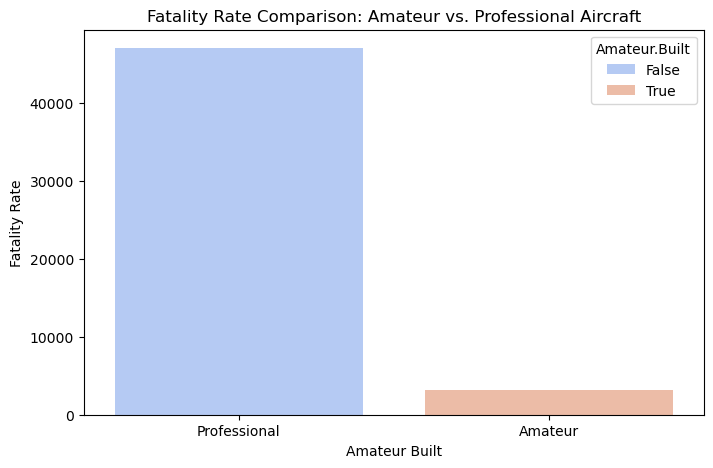

In [724]:
plt.figure(figsize=(8,5))
sns.barplot(x=fatality_stats["Amateur.Built"], 
            y=fatality_stats["Total.Fatal.Injuries"],
            hue=fatality_stats["Amateur.Built"],
            palette = "coolwarm")

plt.xlabel("Amateur Built")
plt.ylabel("Fatality Rate")
plt.title("Fatality Rate Comparison: Amateur vs. Professional Aircraft")
plt.xticks([0, 1], ["Professional", "Amateur"])
plt.show()

- Then professional aircraft appear to have a higher fatality rate compared to amateur-built aircrafts.

In [727]:
# Assuming df has columns: 'Amateur.Built', 'Incident.Severity' 
severity_counts = avidatacopy.groupby(["Amateur.Built", "Incident.Severity"]).size().unstack()

# Stacked bar chart
severity_counts.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")
plt.xlabel("Amateur Built")
plt.ylabel("Number of Incidents")
plt.title("Incident Severity Distribution: Amateur vs. Professional Aircraft")
plt.xticks([0, 1], ["Professional", "Amateur"], rotation=0)
plt.legend(title="Severity")
plt.show()

KeyError: 'Incident.Severity'